## Data Load

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("max_columns", 500)
from datetime import datetime, timedelta
from tqdm import tqdm
import numpy as np

In [1]:
# permits = pd.read_csv("DOB_Permit_Issuance.csv")

In [4]:
new_building_permits = pd.read_csv("new_building_permits.csv", index_col=0)

In [ ]:
# len(permits), len(new_building_permits), len(new_building_permits) / float(len(permits))

## Quick Counts

Just getting a proportional count with respect to all permits issued.

In [ ]:
# (permits['Permit Type'] == 'NB').value_counts()

In [ ]:
# ((permits['Permit Type'] == 'NB') & (permits['Job Type'] == 'NB')).value_counts()

In [ ]:
# ((permits['Permit Type'] == 'NB') & (permits['Job doc. #'] == 1.0)).value_counts()

In [ ]:
# permits[permits['Permit Type'] == 'NB']['Permit Status'].value_counts()

In [ ]:
# ((permits['Permit Type'] == 'NB') & (permits['Filing Status'] == 'INITIAL')).value_counts()

In [ ]:
# permits[permits['Permit Type'] == 'NB']['Filing Status'].value_counts()

## Aggregations

In [5]:
# permits['Issuance Date'] = pd.to_datetime(permits['Issuance Date'])

Note that converting all 50-some thousand entries to datetime is a slow operation.

In [9]:
# permits['Issuance Date'] = pd.to_datetime(new_building_permits['Issuance Date'])

First let's look at daily time-series for all permit issuance (time-series are more palatable than perhaps the more statistically interesting probability density functions).

In [13]:
#
# TODO: Need `DOB_Permit_Issuance.csv` back.
#

# sns.set(font_scale=2)
# permits.groupby(['Issuance Date'])['Issuance Date'].count().plot(figsize=(24, 10), title='Daily DOB Construction Permit Issuance')

In [25]:
daily_permit_issuance = new_building_permits.groupby(['Issuance Date'])['Issuance Date'].count().reindex(
    pd.date_range('25-04-2013', '20-06-2016'), fill_value=0
)

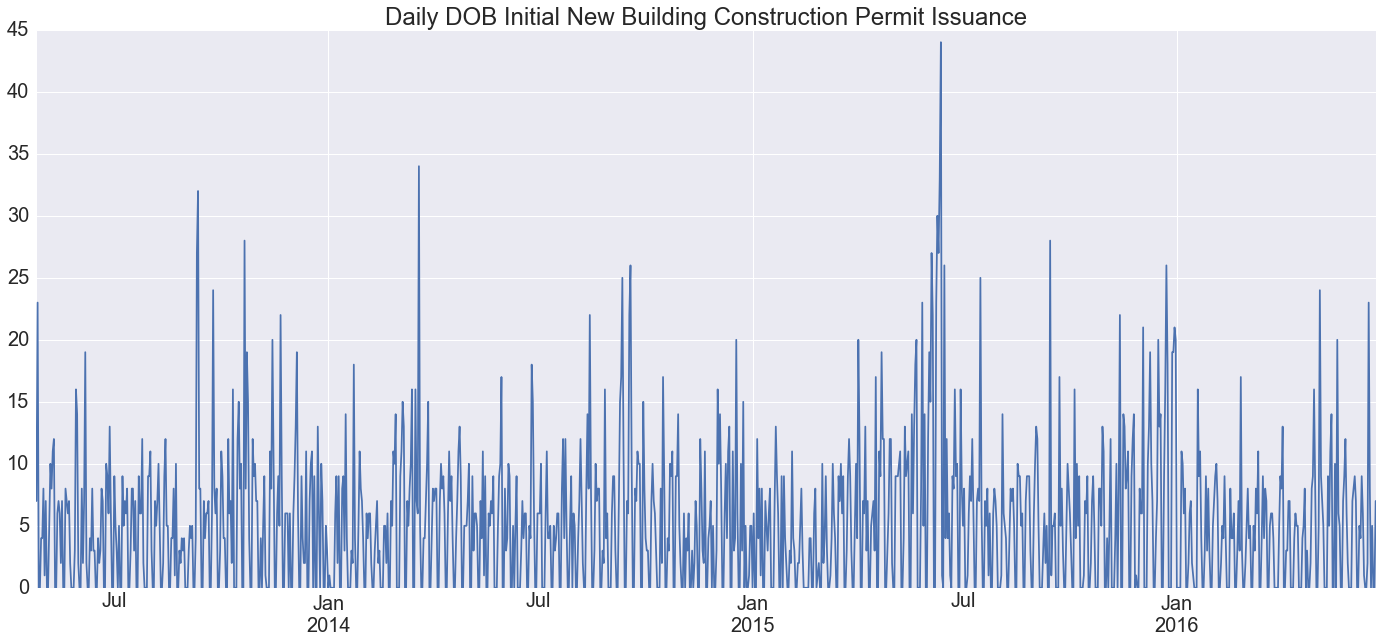

In [26]:
daily_permit_issuance.plot(figsize=(24, 10), title='Daily DOB Initial New Building Construction Permit Issuance')

This is too noisy to display well, let's put it into a rolling mean.

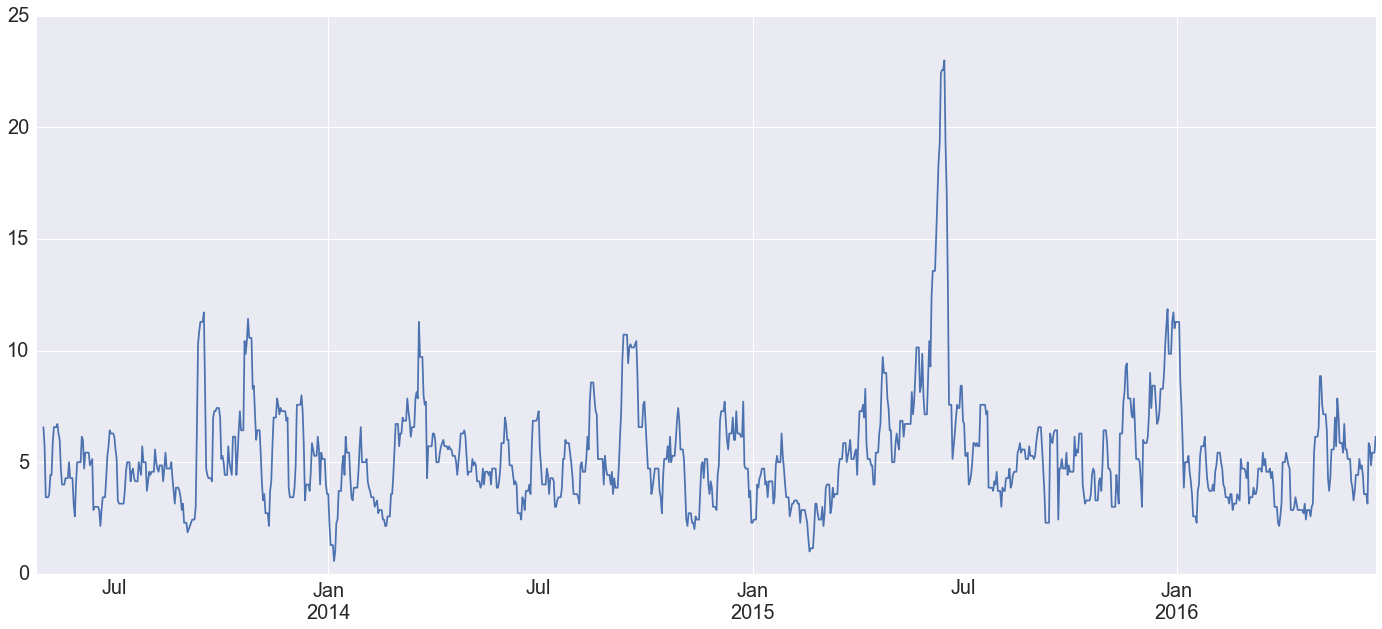

In [46]:
daily_permit_issuance.rolling(7).mean().plot(figsize=(24, 10), fontsize=20)

Business days are more appropro.

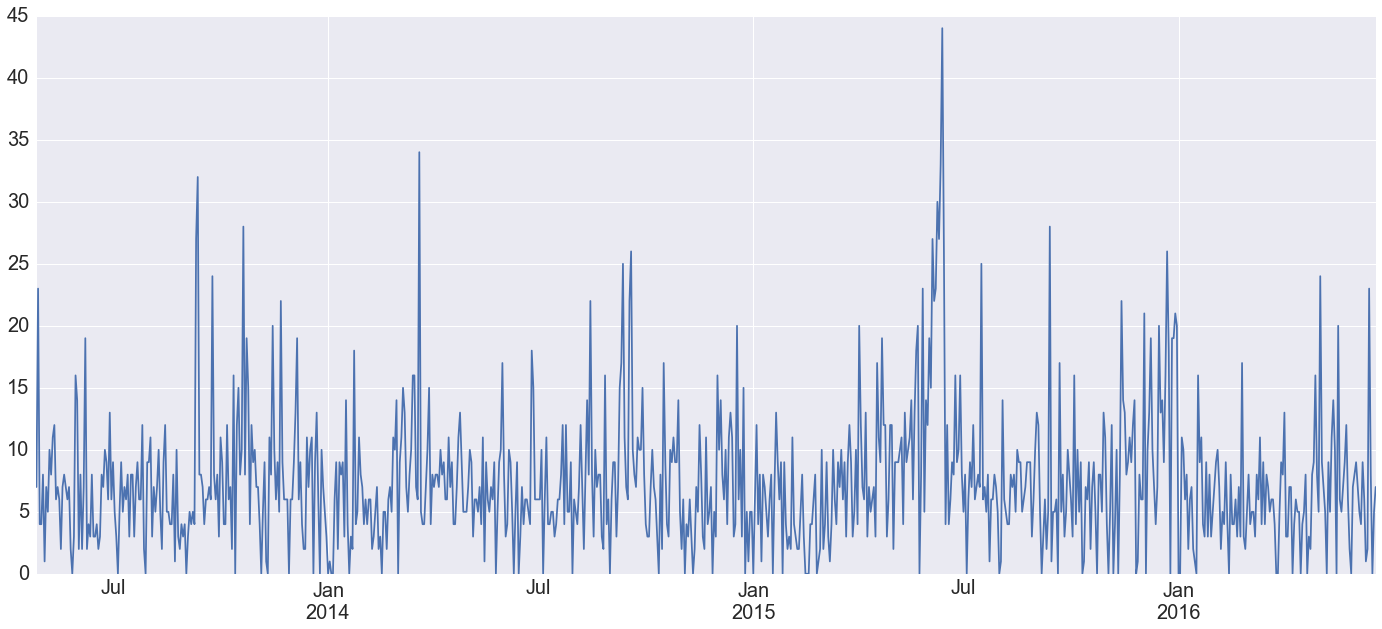

In [54]:
daily_permit_issuance.asfreq(pd.tseries.offsets.BDay()).plot(figsize=(24, 10))